In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime as dt

In [2]:
def get_date_values(df, col):
    """Converts a column to datetime then adds columns for year, year_and_month, and quarter"""
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col])
    df["year"] = df[col].dt.year
    df["year_and_month"] = df[col].dt.strftime("%Y-%m")
    df["quarter"] = pd.PeriodIndex(df[col], freq="Q").astype(str)

In [3]:
# Importing world population data
world_pop = pd.read_csv("WorldBankAllCountriesPopulationData.csv")

In [4]:
# Removing unneeded columns
world_pop = world_pop.drop(["Country Code", "Series Name", "Series Code"], axis=1)

In [5]:
# Need to reshape the data so it is joinable with the other tables
world_pop = pd.melt(
    world_pop, id_vars="Country Name", var_name="year", value_name="population"
)

In [6]:
world_pop

,Country Name,year,population
0,Afghanistan,2018 [YR2018],36686784
1,Albania,2018 [YR2018],2866376
2,Algeria,2018 [YR2018],41927007
3,American Samoa,2018 [YR2018],48424
4,Andorra,2018 [YR2018],75013
...,...,...,...
1297,Virgin Islands (U.S.),2023 [YR2023],104711
1298,West Bank and Gaza,2023 [YR2023],5159253
1299,"Yemen, Rep.",2023 [YR2023],34449825
1300,Zambia,2023 [YR2023],20569737


In [7]:
# Removing unwanted text from year column
world_pop["year"] = world_pop["year"].str[:4]

In [9]:
# Cleaning the population column
world_pop["population"] = pd.to_numeric(world_pop["population"], errors="coerce")
world_pop = world_pop.dropna()
world_pop["population"] = world_pop["population"].astype(int)

/tmp/ipykernel_427/2451233564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_pop["population"] = world_pop["population"].astype(int)


In [10]:
world_pop

,Country Name,year,population
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1297,Virgin Islands (U.S.),2023,104711
1298,West Bank and Gaza,2023,5159253
1299,"Yemen, Rep.",2023,34449825
1300,Zambia,2023,20569737


In [11]:
# Importing UK vaccinations data
uk_vaccinations = pd.read_csv("UkVaccinations.csv")

In [12]:
# Removing unneeded columns and renaming others for consistency
uk_vaccinations = uk_vaccinations.drop(["areaCode", "areaType"], axis=1)
uk_vaccinations = uk_vaccinations.rename(columns={"areaName":"location"})

In [13]:
uk_vaccinations

,location,date,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,United Kingdom,2023-03-29,52301383,49865536.0
1,United Kingdom,2023-03-28,52301261,49865406.0
2,United Kingdom,2023-03-27,52301192,49865299.0
3,United Kingdom,2023-03-26,52301118,49865230.0
4,United Kingdom,2023-03-25,52301147,49865208.0
...,...,...,...,...
832,United Kingdom,2020-12-17,86465,NaN
833,United Kingdom,2020-12-16,86465,NaN
834,United Kingdom,2020-12-15,86465,NaN
835,United Kingdom,2020-12-14,86465,NaN


In [14]:
# Importing UK Covid data
uk_deaths_and_hospitalisations = pd.read_csv("UkDeathsAndHospitalisations.csv")

In [15]:
# Removing unneeded columns and renaming others for consistency
uk_deaths_and_hospitalisations = uk_deaths_and_hospitalisations.drop(
    ["areaCode", "areaType"], axis=1
)
uk_deaths_and_hospitalisations = uk_deaths_and_hospitalisations.rename(columns={"areaName":"location"})

In [16]:
uk_deaths_and_hospitalisations

,location,date,hospitalCases,newDailyNsoDeathsByDeathDate
0,United Kingdom,2023-08-25,NaN,29
1,United Kingdom,2023-08-24,NaN,29
2,United Kingdom,2023-08-23,NaN,26
3,United Kingdom,2023-08-22,NaN,31
4,United Kingdom,2023-08-21,NaN,30
...,...,...,...,...
1299,United Kingdom,2020-02-03,NaN,0
1300,United Kingdom,2020-02-02,NaN,1
1301,United Kingdom,2020-02-01,NaN,0
1302,United Kingdom,2020-01-31,NaN,0


In [17]:
# Importing rest of world Covid data
owid_covid_data = pd.read_csv("OwidCovidData.csv")

In [18]:
owid_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343338,ZWE,Africa,Zimbabwe,2023-09-17,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
343339,ZWE,Africa,Zimbabwe,2023-09-18,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
343340,ZWE,Africa,Zimbabwe,2023-09-19,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
343341,ZWE,Africa,Zimbabwe,2023-09-20,265748.0,0.0,0.857,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [19]:
# Creating year and month columns in each datafram for later reporting purposes
dfs = [uk_vaccinations, uk_deaths_and_hospitalisations, owid_covid_data]
for df in dfs:
    get_date_values(df, "date")

In [20]:
# Removing unneeded columns
owid_deaths_and_hospitalisations = owid_covid_data[
    [
        "location",
        "date",
        "year",
        "year_and_month",
        "quarter",
        "new_deaths",
        "hosp_patients",
    ]
]


In [21]:
# Removing unneeded columns
owid_vaccinations = owid_covid_data[
    [
        "location",
        "date",
        "year",
        "year_and_month",
        "quarter",
        "people_vaccinated",
        "people_fully_vaccinated",
    ]
]

In [22]:
owid_deaths_and_hospitalisations

,location,date,year,year_and_month,quarter,new_deaths,hosp_patients
0,Afghanistan,2020-01-03,2020,2020-01,2020Q1,0.0,NaN
1,Afghanistan,2020-01-04,2020,2020-01,2020Q1,0.0,NaN
2,Afghanistan,2020-01-05,2020,2020-01,2020Q1,0.0,NaN
3,Afghanistan,2020-01-06,2020,2020-01,2020Q1,0.0,NaN
4,Afghanistan,2020-01-07,2020,2020-01,2020Q1,0.0,NaN
...,...,...,...,...,...,...,...
343338,Zimbabwe,2023-09-17,2023,2023-09,2023Q3,0.0,NaN
343339,Zimbabwe,2023-09-18,2023,2023-09,2023Q3,0.0,NaN
343340,Zimbabwe,2023-09-19,2023,2023-09,2023Q3,0.0,NaN
343341,Zimbabwe,2023-09-20,2023,2023-09,2023Q3,0.0,NaN


In [23]:
owid_vaccinations

,location,date,year,year_and_month,quarter,people_vaccinated,people_fully_vaccinated
0,Afghanistan,2020-01-03,2020,2020-01,2020Q1,NaN,NaN
1,Afghanistan,2020-01-04,2020,2020-01,2020Q1,NaN,NaN
2,Afghanistan,2020-01-05,2020,2020-01,2020Q1,NaN,NaN
3,Afghanistan,2020-01-06,2020,2020-01,2020Q1,NaN,NaN
4,Afghanistan,2020-01-07,2020,2020-01,2020Q1,NaN,NaN
...,...,...,...,...,...,...,...
343338,Zimbabwe,2023-09-17,2023,2023-09,2023Q3,NaN,NaN
343339,Zimbabwe,2023-09-18,2023,2023-09,2023Q3,NaN,NaN
343340,Zimbabwe,2023-09-19,2023,2023-09,2023Q3,NaN,NaN
343341,Zimbabwe,2023-09-20,2023,2023-09,2023Q3,NaN,NaN


In [24]:
# Filtering by Denmark and Italy for comparing against the UK
dm_vaccinations = owid_vaccinations[owid_vaccinations["location"] == "Denmark"]
dm_deaths_and_hospitalisations = owid_deaths_and_hospitalisations[
    owid_deaths_and_hospitalisations["location"] == "Denmark"
]
it_vaccinations = owid_vaccinations[owid_vaccinations["location"] == "Italy"]
it_deaths_and_hospitalisations = owid_deaths_and_hospitalisations[
    owid_deaths_and_hospitalisations["location"] == "Italy"
]

In [25]:
# Creating a database
conn = sqlite3.connect("covid_analysis_database.db")
cur = conn.cursor()

In [27]:
# Adding the dataframes as tables to the database
world_pop.to_sql("WorldPopulation", conn, if_exists="replace", index=False)
uk_vaccinations.to_sql("UkVaccinations", conn, if_exists="replace", index=False)
uk_deaths_and_hospitalisations.to_sql(
    "UkDeathsAndHospitalisations", conn, if_exists="replace", index=False
)
dm_vaccinations.to_sql("DmVaccinations", conn, if_exists="replace", index=False)
dm_deaths_and_hospitalisations.to_sql(
    "DmDeathsAndHospitalisations", conn, if_exists="replace", index=False
)
it_vaccinations.to_sql("ItVaccinations", conn, if_exists="replace", index=False)
it_deaths_and_hospitalisations.to_sql(
    "ItDeathsAndHospitalisations", conn, if_exists="replace", index=False
)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [28]:
# Checking the tables are in the database
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
cur.fetchall()

[('WorldPopulation',),
 ('UkVaccinations',),
 ('UkDeathsAndHospitalisations',),
 ('DmVaccinations',),
 ('DmDeathsAndHospitalisations',),
 ('ItVaccinations',),
 ('ItDeathsAndHospitalisations',)]

In [29]:
# Creating a UK vaccinations vs population table
uk_vaccinations_vs_pop = pd.read_sql(
    """
SELECT 
    UV.location,
    UV.year_and_month,
    MAX(UV.cumPeopleVaccinatedFirstDoseByVaccinationDate) AS first_vaccs,
    CAST((MAX(UV.cumPeopleVaccinatedFirstDoseByVaccinationDate) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS first_vaccs_percent_of_pop,
    MAX(UV.cumPeopleVaccinatedSecondDoseByVaccinationDate) AS fully_vaccd,
    CAST((MAX(UV.cumPeopleVaccinatedSecondDoseByVaccinationDate) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS fully_vaccd_percent_of_pop,
    WP.population 
FROM UkVaccinations AS UV
JOIN WorldPopulation AS WP
    ON WP.year = UV.year
    AND WP.[Country Name] = UV.location
GROUP BY UV.year_and_month;
""",
    conn,
)

In [30]:
uk_vaccinations_vs_pop

,location,year_and_month,first_vaccs,first_vaccs_percent_of_pop,fully_vaccd,fully_vaccd_percent_of_pop,population
0,United Kingdom,2020-12,1005073,1.498292,NaN,NaN,67081234
1,United Kingdom,2021-01,9448950,14.097377,497644.0,0.742461,67026300
2,United Kingdom,2021-02,20245742,30.205669,814509.0,1.215208,67026300
3,United Kingdom,2021-03,30033079,44.807902,4308622.0,6.428256,67026300
4,United Kingdom,2021-04,33216586,49.557541,14279431.0,21.304221,67026300
5,United Kingdom,2021-05,38423765,57.326400,24882367.0,37.123289,67026300
6,United Kingdom,2021-06,43809130,65.361105,32135771.0,47.945017,67026300
7,United Kingdom,2021-07,45735209,68.234721,37404458.0,55.805643,67026300
8,United Kingdom,2021-08,46968894,70.075320,42019163.0,62.690560,67026300
9,United Kingdom,2021-09,47736402,71.220405,44012028.0,65.663819,67026300


In [31]:
# Creating a UK Covid deaths & hospitalisations vs population table
uk_deaths_and_hospitalisations_vs_pop = pd.read_sql(
    """
SELECT 
    UDH.location,
    UDH.quarter,
    SUM(UDH.hospitalCases) AS daily_hospitalisations,
    CAST((SUM(UDH.hospitalCases) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_hospitalisations_per_100k,
    SUM(UDH.newDailyNsoDeathsByDeathDate) AS daily_deaths,
    CAST((SUM(UDH.newDailyNsoDeathsByDeathDate) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_deaths_per_100k,
    WP.population 
FROM UkDeathsAndHospitalisations AS UDH
JOIN WorldPopulation AS WP
    ON WP.year = UDH.year
    AND WP.[Country Name] = UDH.location
GROUP BY UDH.quarter;
""",
    conn,
)

In [32]:
uk_deaths_and_hospitalisations_vs_pop

,location,quarter,daily_hospitalisations,daily_hospitalisations_per_100k,daily_deaths,daily_deaths_per_100k,population
0,United Kingdom,2020Q1,NaN,NaN,5141,7.663842,67081234
1,United Kingdom,2020Q2,1027646.0,1531.942600,51058,76.113686,67081234
2,United Kingdom,2020Q3,129506.0,193.058464,2586,3.855027,67081234
3,United Kingdom,2020Q4,1258378.0,1875.901687,36213,53.983801,67081234
4,United Kingdom,2021Q1,1895607.0,2828.154023,57709,86.099039,67026300
5,United Kingdom,2021Q2,138198.0,206.184736,2011,3.000315,67026300
6,United Kingdom,2021Q3,546676.0,815.614169,9539,14.231727,67026300
7,United Kingdom,2021Q4,738837.0,1102.309094,13140,19.604245,67026300
8,United Kingdom,2022Q1,1322322.0,1974.457429,15089,22.530509,66971411
9,United Kingdom,2022Q2,963379.0,1438.492912,8750,13.065276,66971411


In [33]:
# Creating a Denmark vaccinations vs population table
dm_vaccinations_vs_pop = pd.read_sql(
    """
SELECT 
    DV.location,
    DV.year_and_month,
    MAX(DV.people_vaccinated) AS first_vaccs,
    CAST((MAX(DV.people_vaccinated) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS first_vaccs_percent_of_pop,
    MAX(DV.people_fully_vaccinated) AS fully_vaccd,
    CAST((MAX(DV.people_fully_vaccinated) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS fully_vaccd_percent_of_pop,
    WP.population 
FROM DmVaccinations AS DV
JOIN WorldPopulation AS WP
    ON WP.year = DV.year
    AND WP.[Country Name] = DV.location
GROUP BY DV.year_and_month;
""",
    conn,
)

In [34]:
dm_vaccinations_vs_pop

,location,year_and_month,first_vaccs,first_vaccs_percent_of_pop,fully_vaccd,fully_vaccd_percent_of_pop,population
0,Denmark,2020-01,NaN,NaN,NaN,NaN,5831404
1,Denmark,2020-02,NaN,NaN,NaN,NaN,5831404
2,Denmark,2020-03,NaN,NaN,NaN,NaN,5831404
3,Denmark,2020-04,NaN,NaN,NaN,NaN,5831404
4,Denmark,2020-05,NaN,NaN,NaN,NaN,5831404
5,Denmark,2020-06,NaN,NaN,NaN,NaN,5831404
6,Denmark,2020-07,NaN,NaN,NaN,NaN,5831404
7,Denmark,2020-08,NaN,NaN,NaN,NaN,5831404
8,Denmark,2020-09,NaN,NaN,NaN,NaN,5831404
9,Denmark,2020-10,NaN,NaN,NaN,NaN,5831404


In [35]:
# Creating a Denmark Covid deaths & hospitalisations vs population table
dm_deaths_and_hospitalisations_vs_pop = pd.read_sql(
    """
SELECT 
    DDH.location,
    DDH.quarter,
    SUM(DDH.hosp_patients) AS daily_hospitalisations,
    CAST((SUM(DDH.hosp_patients) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_hospitalisations_per_100k,
    SUM(DDH.new_deaths) AS daily_deaths,
    CAST((SUM(DDH.new_deaths) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_deaths_per_100k,
    WP.population 
FROM DmDeathsAndHospitalisations AS DDH
JOIN WorldPopulation AS WP
    ON WP.year = DDH.year
    AND WP.[Country Name] = DDH.location
GROUP BY DDH.quarter;
""",
    conn,
)

In [36]:
dm_deaths_and_hospitalisations_vs_pop

,location,quarter,daily_hospitalisations,daily_hospitalisations_per_100k,daily_deaths,daily_deaths_per_100k,population
0,Denmark,2020Q1,NaN,NaN,77.0,1.320437,5831404
1,Denmark,2020Q2,16405.0,281.321617,534.0,9.157314,5831404
2,Denmark,2020Q3,2934.0,50.313784,45.0,0.771684,5831404
3,Denmark,2020Q4,27159.0,465.736896,600.0,10.289117,5831404
4,Denmark,2021Q1,40299.0,688.079856,1161.0,19.823338,5856733
5,Denmark,2021Q2,13753.0,234.823749,117.0,1.997701,5856733
6,Denmark,2021Q3,7981.0,136.270511,120.0,2.048924,5856733
7,Denmark,2021Q4,30808.0,526.027053,602.0,10.278768,5856733
8,Denmark,2022Q1,110180.0,1866.496856,2412.0,40.860323,5903037
9,Denmark,2022Q2,45231.0,766.232704,795.0,13.467644,5903037


In [37]:
# Creating a Italy vaccinations vs population table
it_vaccinations_vs_pop = pd.read_sql(
    """
SELECT 
    IV.location,
    IV.year_and_month,
    MAX(IV.people_vaccinated) AS first_vaccs,
    CAST((MAX(IV.people_vaccinated) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS first_vaccs_percent_of_pop,
    MAX(IV.people_fully_vaccinated) AS fully_vaccd,
    CAST((MAX(IV.people_fully_vaccinated) 
        * 1.0 / WP.population) * 100 AS FLOAT) AS fully_vaccd_percent_of_pop,
    WP.population 
FROM ItVaccinations AS IV
JOIN WorldPopulation AS WP
    ON WP.year = IV.year
    AND WP.[Country Name] = IV.location
GROUP BY IV.year_and_month;
""",
    conn,
)

In [38]:
it_vaccinations_vs_pop

,location,year_and_month,first_vaccs,first_vaccs_percent_of_pop,fully_vaccd,fully_vaccd_percent_of_pop,population
0,Italy,2020-01,NaN,NaN,NaN,NaN,59438851
1,Italy,2020-02,NaN,NaN,NaN,NaN,59438851
2,Italy,2020-03,NaN,NaN,NaN,NaN,59438851
3,Italy,2020-04,NaN,NaN,NaN,NaN,59438851
4,Italy,2020-05,NaN,NaN,NaN,NaN,59438851
5,Italy,2020-06,NaN,NaN,NaN,NaN,59438851
6,Italy,2020-07,NaN,NaN,NaN,NaN,59438851
7,Italy,2020-08,NaN,NaN,NaN,NaN,59438851
8,Italy,2020-09,NaN,NaN,NaN,NaN,59438851
9,Italy,2020-10,NaN,NaN,NaN,NaN,59438851


In [39]:
# Creating a Italy Covid deaths & hospitalisations vs population table
it_deaths_and_hospitalisations_vs_pop = pd.read_sql(
    """
SELECT 
    IDH.location,
    IDH.quarter,
    SUM(IDH.hosp_patients) AS daily_hospitalisations,
    CAST((SUM(IDH.hosp_patients) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_hospitalisations_per_100k,
    SUM(IDH.new_deaths) AS daily_deaths,
    CAST((SUM(IDH.new_deaths) * 1.0 / WP.population) 
        * 100000 AS FLOAT) AS daily_deaths_per_100k,
    WP.population 
FROM ItDeathsAndHospitalisations AS IDH
JOIN WorldPopulation AS WP
    ON WP.year = IDH.year
    AND WP.[Country Name] = IDH.location
GROUP BY IDH.quarter;
""",
    conn,
)

In [40]:
it_deaths_and_hospitalisations_vs_pop

,location,quarter,daily_hospitalisations,daily_hospitalisations_per_100k,daily_deaths,daily_deaths_per_100k,population
0,Italy,2020Q1,458856.0,771.979929,11591.0,19.500713,59438851
1,Italy,2020Q2,1346984.0,2266.167628,23153.0,38.952637,59438851
2,Italy,2020Q3,128253.0,215.773014,1131.0,1.902796,59438851
3,Italy,2020Q4,2194571.0,3692.149096,37729.0,63.475319,59438851
4,Italy,2021Q1,2230333.0,3773.211854,35275.0,59.677209,59109668
5,Italy,2021Q2,1404486.0,2376.068159,18663.0,31.573515,59109668
6,Italy,2021Q3,294420.0,498.091108,3328.0,5.630213,59109668
7,Italy,2021Q4,490711.0,830.170455,6377.0,10.788421,59109668
8,Italy,2022Q1,1348101.0,2290.474378,21977.0,37.339751,58856847
9,Italy,2022Q2,706035.0,1199.580059,9070.0,15.410272,58856847


In [41]:
# Combining the vaccinations tables of the three nations
combined_vaccs = pd.concat(
    [
        uk_vaccinations_vs_pop,
        dm_vaccinations_vs_pop,
        it_vaccinations_vs_pop
    ]
)

# Combining the deaths & hospitalisations tables of the three nations
combined_deaths_and_hospitalisations = pd.concat(
    [
        uk_deaths_and_hospitalisations_vs_pop,
        dm_deaths_and_hospitalisations_vs_pop,
        it_deaths_and_hospitalisations_vs_pop
        
    ]
)

In [42]:
combined_vaccs

,location,year_and_month,first_vaccs,first_vaccs_percent_of_pop,fully_vaccd,fully_vaccd_percent_of_pop,population
0,United Kingdom,2020-12,1005073.0,1.498292,NaN,NaN,67081234
1,United Kingdom,2021-01,9448950.0,14.097377,497644.0,0.742461,67026300
2,United Kingdom,2021-02,20245742.0,30.205669,814509.0,1.215208,67026300
3,United Kingdom,2021-03,30033079.0,44.807902,4308622.0,6.428256,67026300
4,United Kingdom,2021-04,33216586.0,49.557541,14279431.0,21.304221,67026300
...,...,...,...,...,...,...,...
40,Italy,2023-05,50926362.0,86.812429,47952736.0,81.743390,58662524
41,Italy,2023-06,50926567.0,86.812778,47953058.0,81.743939,58662524
42,Italy,2023-07,50926681.0,86.812973,47953134.0,81.744069,58662524
43,Italy,2023-08,50926787.0,86.813153,47953202.0,81.744185,58662524


In [43]:
combined_deaths_and_hospitalisations

,location,quarter,daily_hospitalisations,daily_hospitalisations_per_100k,daily_deaths,daily_deaths_per_100k,population
0,United Kingdom,2020Q1,NaN,NaN,5141.0,7.663842,67081234
1,United Kingdom,2020Q2,1027646.0,1531.942600,51058.0,76.113686,67081234
2,United Kingdom,2020Q3,129506.0,193.058464,2586.0,3.855027,67081234
3,United Kingdom,2020Q4,1258378.0,1875.901687,36213.0,53.983801,67081234
4,United Kingdom,2021Q1,1895607.0,2828.154023,57709.0,86.099039,67026300
5,United Kingdom,2021Q2,138198.0,206.184736,2011.0,3.000315,67026300
6,United Kingdom,2021Q3,546676.0,815.614169,9539.0,14.231727,67026300
7,United Kingdom,2021Q4,738837.0,1102.309094,13140.0,19.604245,67026300
8,United Kingdom,2022Q1,1322322.0,1974.457429,15089.0,22.530509,66971411
9,United Kingdom,2022Q2,963379.0,1438.492912,8750.0,13.065276,66971411


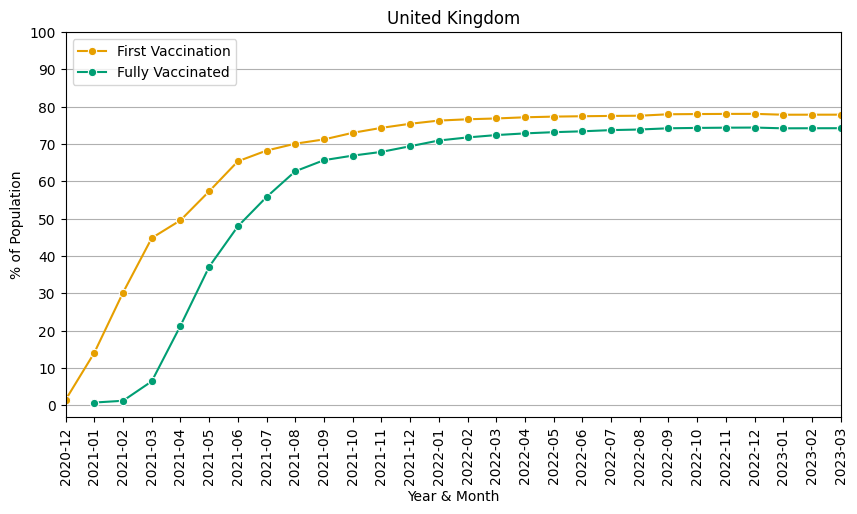

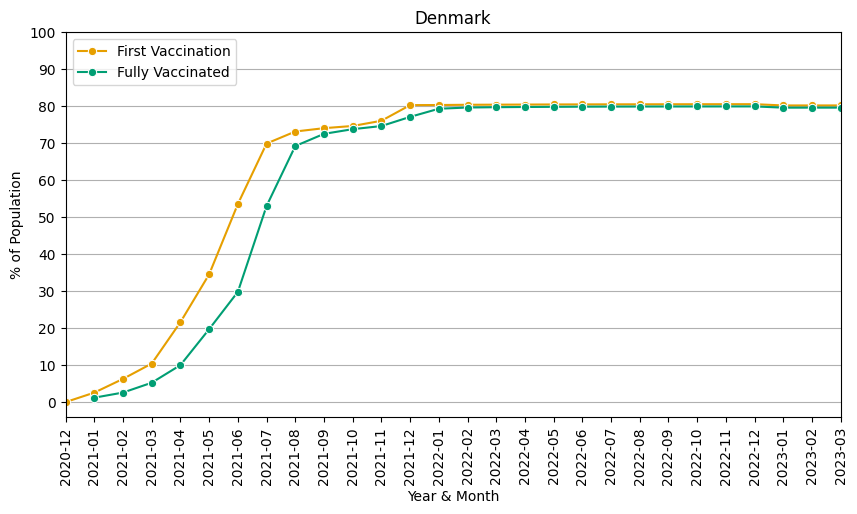

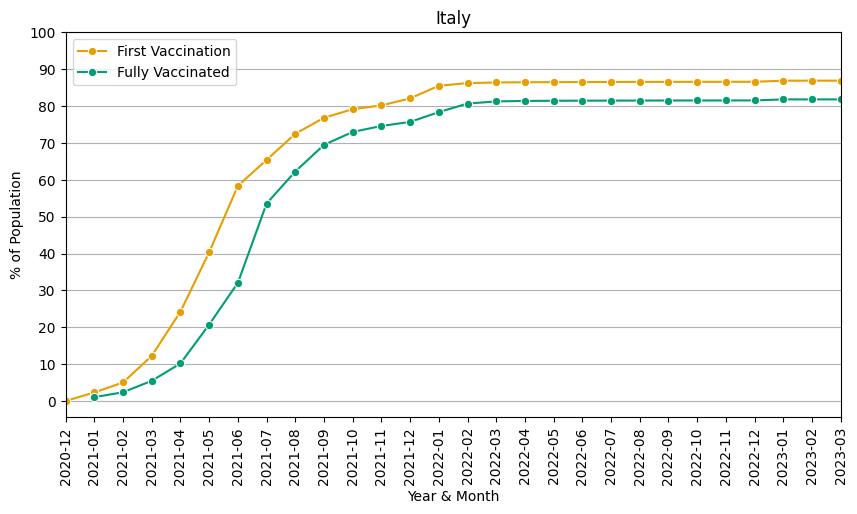

In [44]:
# Creating charts of first and fully vaccinated percent of population for each nation
for location in combined_vaccs["location"].unique():
    by_location = combined_vaccs[combined_vaccs["location"] == location]

    fig, axis = plt.subplots(figsize=(10, 5))
    plt.xticks(rotation=90)

    sns.lineplot(
        data=by_location,
        x="year_and_month",
        y="first_vaccs_percent_of_pop",
        label="First Vaccination",
        marker="o",
        color="#E69F00",
    )

    sns.lineplot(
        data=by_location,
        x="year_and_month",
        y="fully_vaccd_percent_of_pop",
        label="Fully Vaccinated",
        marker="o",
        color="#009E73",
    )
    axis.set_title(location)

    axis.set_xlabel("Year & Month")
    axis.set_ylabel("% of Population")
    axis.set_yticks(range(0, 101, 10))
    axis.set_xlim("2020-12", "2023-03")
    axis.yaxis.grid(True)
    axis.legend(loc="upper left")
    plt.show()

In [46]:
# Getting max hospitalisations & deaths for use in the axis
hospitalisations_no_nan = combined_deaths_and_hospitalisations.dropna(
    subset=["daily_hospitalisations_per_100k"]
)
max_hospitalisations = max(
    hospitalisations_no_nan["daily_hospitalisations_per_100k"]
)
max_deaths = max(combined_deaths_and_hospitalisations["daily_deaths_per_100k"])


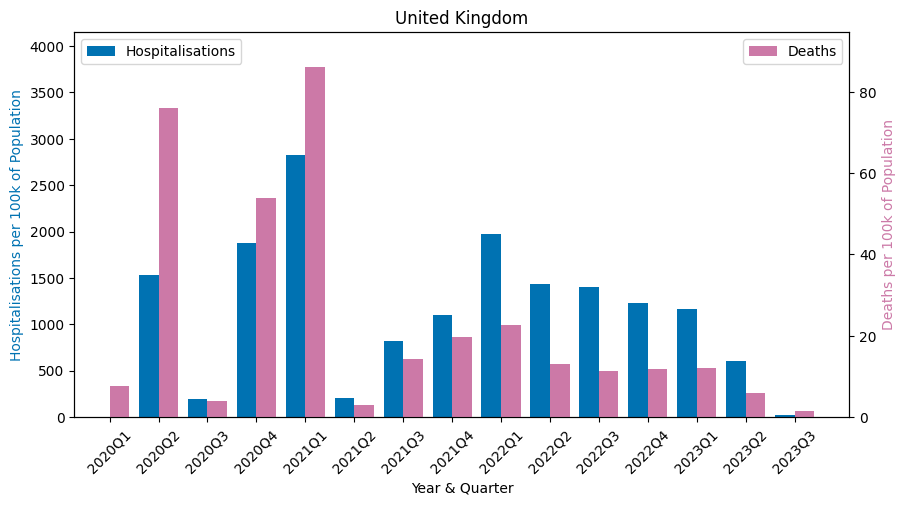

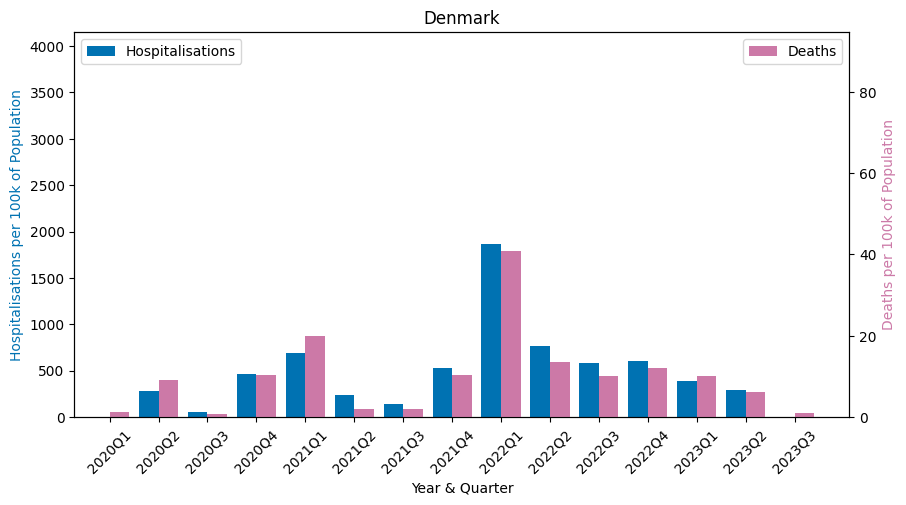

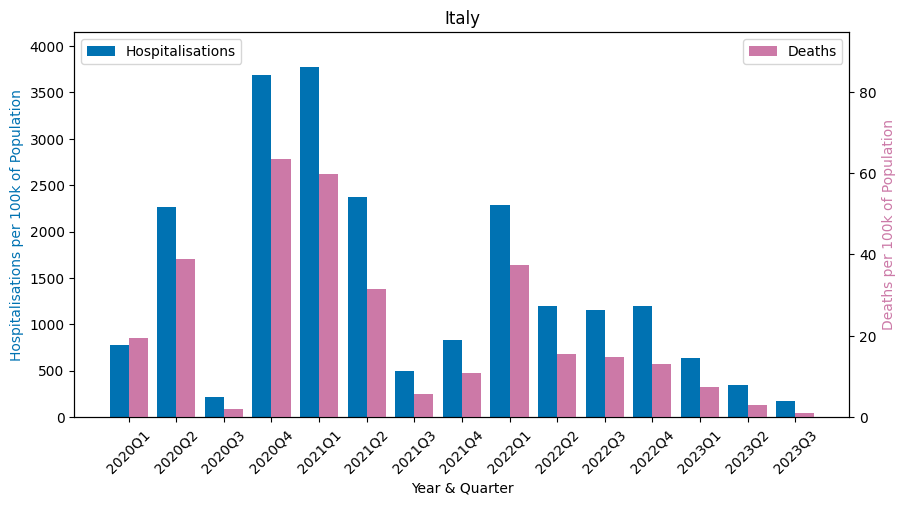

In [47]:
# Creating charts of hospitalisations & deaths per 100k of population for each nation
for location in combined_deaths_and_hospitalisations["location"].unique():
    by_location = combined_deaths_and_hospitalisations[
        combined_deaths_and_hospitalisations["location"] == location
    ]

    fig, axis1 = plt.subplots(figsize=(10, 5))

    x = np.arange(len(by_location["quarter"]))

    # Width of each bar
    bar_width = 0.4

    # Plot hospitalisations on the primary y-axis (left)
    axis1.bar(
        x - bar_width / 2,
        by_location["daily_hospitalisations_per_100k"],
        label="Hospitalisations",
        color="#0072B2",
        width=bar_width,
    )
    axis1.set_xlabel("Year & Quarter")
    axis1.set_ylabel("Hospitalisations per 100k of Population", color="#0072B2")

    # Create a secondary y-axis (right) for deaths
    axis2 = axis1.twinx()
    axis2.bar(
        x + bar_width / 2,
        by_location["daily_deaths_per_100k"],
        label="Deaths",
        color="#CC79A7",
        width=bar_width,
    )

    # Set x-axis labels
    axis1.set_xticks(x)
    axis1.set_ylim(0, max_hospitalisations * 1.1)
    axis1.set_xticklabels(by_location["quarter"], rotation=45)
    axis1.legend(loc="upper left")
    axis2.set_ylabel("Deaths per 100k of Population", color="#CC79A7")
    axis2.set_ylim(0, max_deaths * 1.1)
    axis2.legend(loc="upper right")

    plt.title(location)
    plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0848d0af-8527-4b35-813b-265c56a81f9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>